In [1]:
# -*- coding: utf-8 -*-
#加载所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

import tensorflow
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

In [2]:
#加载数据
#path = "C:/Users/Administrator/Desktop/Python Process/AA.xlsx"
path = "C:/Users/Administrator/Desktop/Python Process/CC.xlsx"
file = pd.read_excel(path,sheet_name='Sheet2')
data = file.copy()
#重置行索引
data.set_index('年份',inplace=True)
data = round(data,1)
data

,国内生产总值,第三产业增加值,国内旅游人数,国际旅游外汇收入,旅游周转里程,社会消费品销售额,住宿营业额,餐饮营业额
年份,,,,,,,,
1981,4935.8,1121.1,300.0,785.0,2500.0,2350.0,500.0,200.0
1982,5373.4,1214.0,315.0,843.0,2743.0,2570.0,518.0,210.0
1983,6020.9,1397.1,335.0,941.0,3095.0,2849.4,545.0,225.0
1984,7278.5,1858.2,351.7,1131.0,3620.0,3376.4,566.0,236.7
1985,9098.9,2670.8,369.2,1250.0,4435.4,4305.0,588.5,249.2
1986,10376.2,3097.0,386.7,1531.0,4896.5,4950.0,611.0,261.7
1987,12174.6,3696.3,404.2,1862.0,5415.5,5820.0,633.5,274.2
1988,15180.4,4742.0,421.7,2247.0,6208.9,7440.0,656.0,286.7
1989,17179.7,5650.8,439.2,1860.0,6074.6,8101.4,678.5,299.2


<Figure size 1200x800 with 0 Axes>

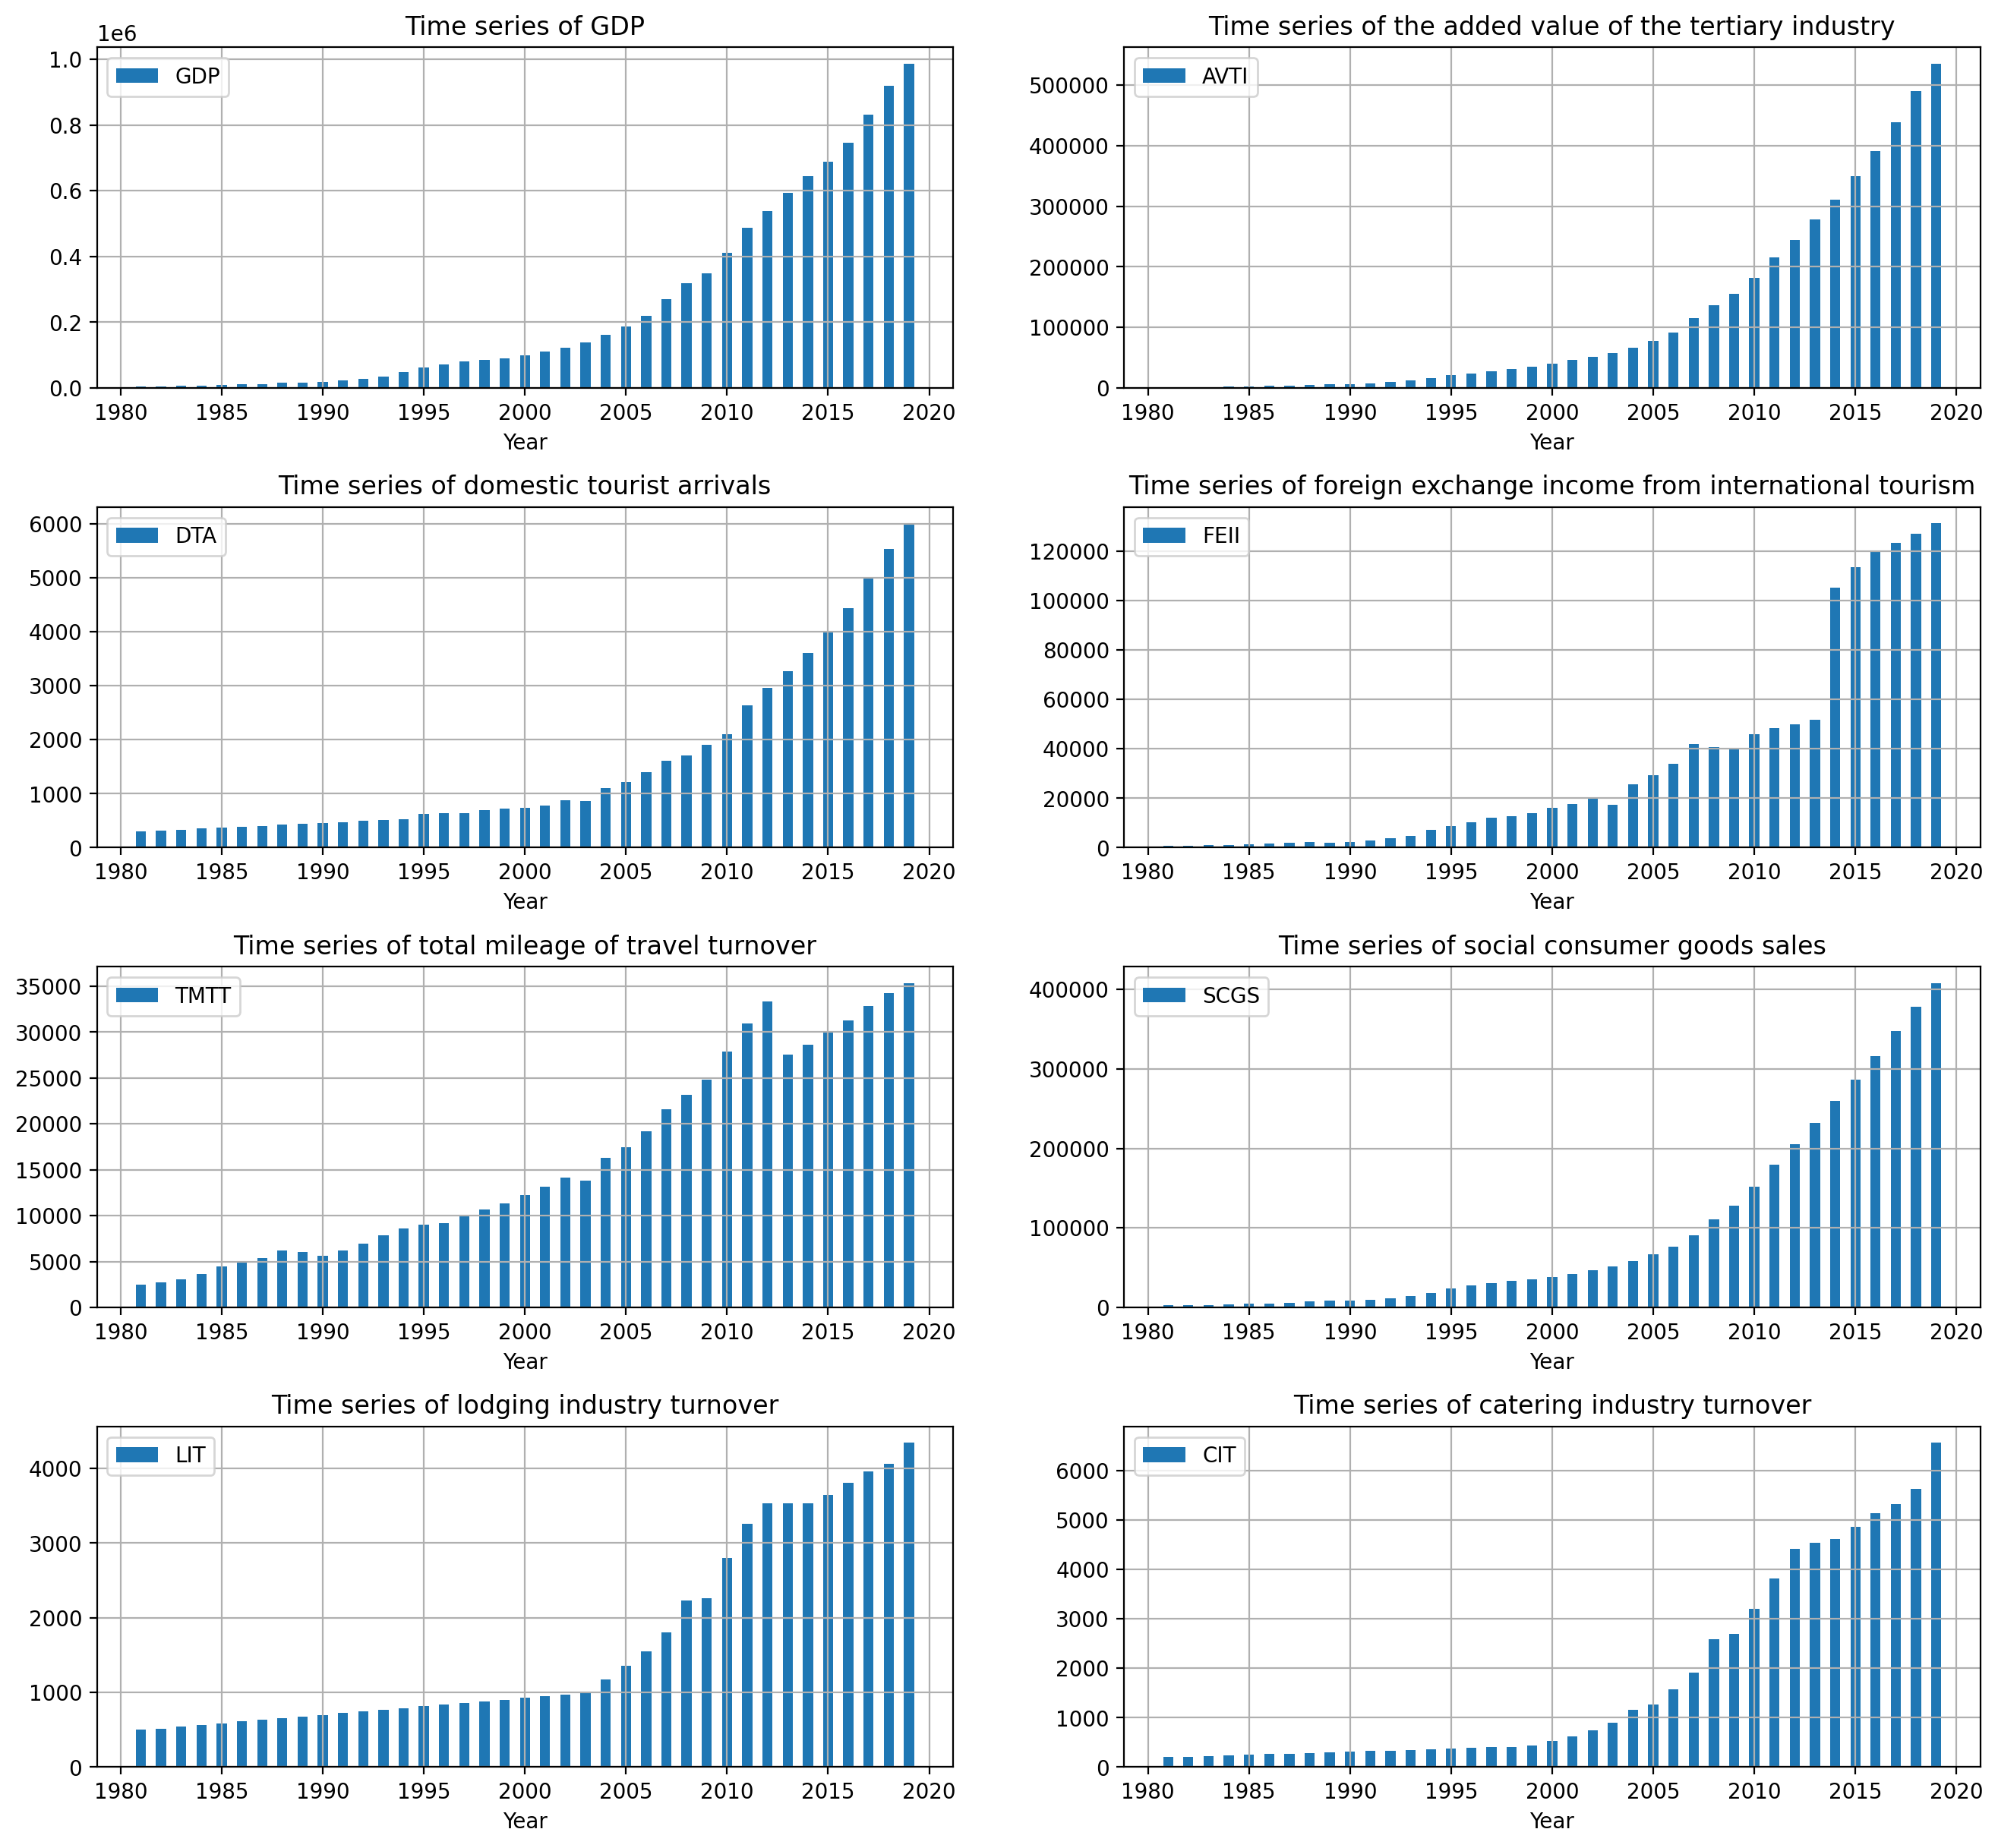

In [3]:
x = np.arange(1981,2020)
#定义画布
fig=plt.figure(dpi=200)
fig,ax=plt.subplots(4,2,dpi=200,figsize=(16,15))
plt.subplots_adjust(wspace =0.20, hspace =0.35)
#多子图

ax[0][0].bar(x,data['国内生产总值'],width=0.5,label='GDP')
ax[0][0].set_xlabel('Year')
ax[0][0].set_title('Time series of GDP')
ax[0][0].grid(True)
ax[0][0].legend()


ax[0][1].bar(x,data['第三产业增加值'],width=0.5,label='AVTI')
ax[0][1].set_xlabel('Year')
ax[0][1].set_title('Time series of the added value of the tertiary industry')
ax[0][1].grid(True)
ax[0][1].legend()

ax[1][0].bar(x,data['国内旅游人数'],width=0.5,label='DTA')
ax[1][0].set_xlabel('Year')
ax[1][0].set_title('Time series of domestic tourist arrivals')
ax[1][0].grid(True)
ax[1][0].legend()

ax[1][1].bar(x,data['国际旅游外汇收入'],width=0.5,label='FEII')
ax[1][1].set_xlabel('Year')
ax[1][1].set_title('Time series of foreign exchange income from international tourism')
ax[1][1].grid(True)
ax[1][1].legend()

ax[2][0].bar(x,data['旅游周转里程'],width=0.5,label='TMTT')
ax[2][0].set_xlabel('Year')
ax[2][0].set_title('Time series of total mileage of travel turnover')
ax[2][0].grid(True)
ax[2][0].legend()

ax[2][1].bar(x,data['社会消费品销售额'],width=0.5,label='SCGS')
ax[2][1].set_xlabel('Year')
ax[2][1].set_title('Time series of social consumer goods sales')
ax[2][1].grid(True)
ax[2][1].legend()

ax[3][0].bar(x,data['住宿营业额'],width=0.5,label='LIT')
ax[3][0].set_xlabel('Year')
ax[3][0].set_title('Time series of lodging industry turnover')
ax[3][0].grid(True)
ax[3][0].legend()

ax[3][1].bar(x,data[ '餐饮营业额'],width=0.5,label='CIT')
ax[3][1].set_xlabel('Year')
ax[3][1].set_title('Time series of catering industry turnover')
ax[3][1].grid(True)
ax[3][1].legend()

plt.show()


In [4]:
round(data.corr(),3)

,国内生产总值,第三产业增加值,国内旅游人数,国际旅游外汇收入,旅游周转里程,社会消费品销售额,住宿营业额,餐饮营业额
国内生产总值,1.000,0.996,0.995,0.975,0.944,0.998,0.985,0.992
第三产业增加值,0.996,1.000,1.000,0.980,0.916,0.999,0.969,0.982
国内旅游人数,0.995,1.000,1.000,0.980,0.913,0.998,0.967,0.980
国际旅游外汇收入,0.975,0.980,0.980,1.000,0.895,0.980,0.940,0.953
旅游周转里程,0.944,0.916,0.913,0.895,1.000,0.925,0.967,0.953
社会消费品销售额,0.998,0.999,0.998,0.980,0.925,1.000,0.976,0.986
住宿营业额,0.985,0.969,0.967,0.940,0.967,0.976,1.000,0.996
餐饮营业额,0.992,0.982,0.980,0.953,0.953,0.986,0.996,1.000


In [5]:
round(data.describe(),2)

,国内生产总值,第三产业增加值,国内旅游人数,国际旅游外汇收入,旅游周转里程,社会消费品销售额,住宿营业额,餐饮营业额
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,242400.43,115145.49,1560.42,33107.08,15704.62,95613.05,1641.39,1742.61
std,290787.99,152131.99,1600.54,40938.54,10775.56,119055.25,1277.28,1969.59
min,4935.80,1121.10,300.00,785.00,2500.00,2350.00,500.00,200.00
25%,20439.25,6849.40,465.45,2546.00,6193.60,8857.85,712.25,317.95
50%,100280.10,39899.10,744.00,16224.00,12261.10,38447.10,926.00,528.50
75%,380318.50,168413.50,2002.50,43866.50,26203.25,140207.20,2529.25,2940.75
max,986515.20,535371.00,6006.00,131254.00,35349.20,408017.20,4343.60,6557.40


In [6]:
#加载数据
#path = "C:/Users/Administrator/Desktop/Python Process/AA.xlsx"
path = "C:/Users/Administrator/Desktop/Python Process/CC.xlsx"
file = pd.read_excel(path,sheet_name='Sheet1')
data = file.copy()
#重置行索引
data.set_index('Year',inplace=True)
data = round(data,1)
data

,AVTI,DTA,TMTT,LIT,SCGS,CIT,GDP
Year,,,,,,,
1981,1121.1,300.0,2500.0,500.0,200.0,2350.0,4935.8
1982,1214.0,315.0,2743.0,518.0,210.0,2570.0,5373.4
1983,1397.1,335.0,3095.0,545.0,225.0,2849.4,6020.9
1984,1858.2,351.7,3620.0,566.0,236.7,3376.4,7278.5
1985,2670.8,369.2,4435.4,588.5,249.2,4305.0,9098.9
1986,3097.0,386.7,4896.5,611.0,261.7,4950.0,10376.2
1987,3696.3,404.2,5415.5,633.5,274.2,5820.0,12174.6
1988,4742.0,421.7,6208.9,656.0,286.7,7440.0,15180.4
1989,5650.8,439.2,6074.6,678.5,299.2,8101.4,17179.7


In [7]:
#描述统计
Desc_result = round(data.describe(),2)
Desc_result

,AVTI,DTA,TMTT,LIT,SCGS,CIT,GDP
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,115145.49,1560.42,15704.62,1641.39,1742.61,95613.05,242400.43
std,152131.99,1600.54,10775.56,1277.28,1969.59,119055.25,290787.99
min,1121.10,300.00,2500.00,500.00,200.00,2350.00,4935.80
25%,6849.40,465.45,6193.60,712.25,317.95,8857.85,20439.25
50%,39899.10,744.00,12261.10,926.00,528.50,38447.10,100280.10
75%,168413.50,2002.50,26203.25,2529.25,2940.75,140207.20,380318.50
max,535371.00,6006.00,35349.20,4343.60,6557.40,408017.20,986515.20


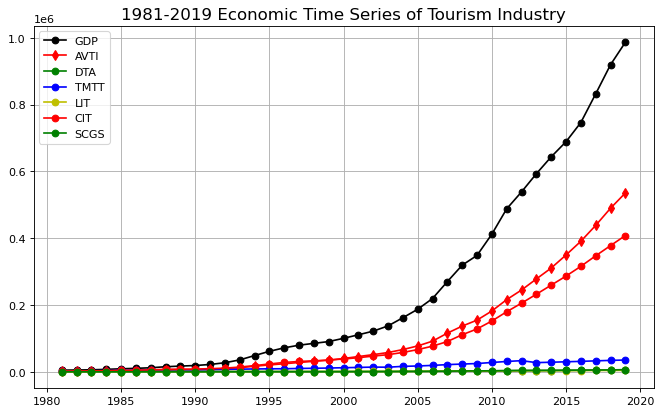

In [8]:
#时间序列可视化
plt.figure(figsize=(10,6),dpi=80)
plt.plot(data['GDP'],'ko-',label='GDP')
plt.plot(data['AVTI'],'rd-',label='AVTI')
plt.plot(data['DTA'],'go-',label='DTA')
plt.plot(data['TMTT'],'bo-',label='TMTT')
plt.plot(data['LIT'],'yo-',label='LIT')
plt.plot(data['CIT'],'ro-',label='CIT')
plt.plot(data['SCGS'],'go-',label='SCGS')
plt.title('1981-2019 Economic Time Series of Tourism Industry',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaler = scaler.fit_transform(data)
data_scaler

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.73888661e-04, 2.62881178e-03, 7.39744042e-03, 4.68310958e-03,
        1.57297008e-03, 5.42316460e-04, 4.45812127e-04],
       [5.16612170e-04, 6.13389415e-03, 1.81130743e-02, 1.17077740e-02,
        3.93242521e-03, 1.23105837e-03, 1.10546330e-03],
       [1.37969141e-03, 9.06063792e-03, 3.40951987e-02, 1.71714018e-02,
        5.77280020e-03, 2.53015280e-03, 2.38666378e-03],
       [2.90070246e-03, 1.21275850e-02, 5.89177210e-02, 2.30252888e-02,
        7.73901280e-03, 4.81922127e-03, 4.24122593e-03],
       [3.69845647e-03, 1.51945321e-02, 7.29545925e-02, 2.88791758e-02,
        9.70522541e-03, 6.40919453e-03, 5.54249610e-03],
       [4.82021616e-03, 1.82614791e-02, 8.87540640e-02, 3.47330628e-02,
        1.16714380e-02, 8.55380963e-03, 7.37464539e-03],
       [6.77753987e-03, 2.13284262e-02, 1.12906859e-01, 4.05869497e-02,
        1.36376506e-02, 1

In [10]:
#定义series_to_supervised()函数
#将时间序列转换为监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#将时间序列转换为监督学习问题
reframed = series_to_supervised(data_scaler, 1, 1)
reframed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000174,0.002629,0.007397,0.004683,0.001573,0.000542,0.000446
2,0.000174,0.002629,0.007397,0.004683,0.001573,0.000542,0.000446,0.000517,0.006134,0.018113,0.011708,0.003932,0.001231,0.001105
3,0.000517,0.006134,0.018113,0.011708,0.003932,0.001231,0.001105,0.001380,0.009061,0.034095,0.017171,0.005773,0.002530,0.002387
4,0.001380,0.009061,0.034095,0.017171,0.005773,0.002530,0.002387,0.002901,0.012128,0.058918,0.023025,0.007739,0.004819,0.004241
5,0.002901,0.012128,0.058918,0.023025,0.007739,0.004819,0.004241,0.003698,0.015195,0.072955,0.028879,0.009705,0.006409,0.005542


In [11]:
# 删除不想预测的特征列，这里只预测收益率
reframed.drop(reframed.columns[[7,8,9,10,11,12]], axis=1, inplace=True)
# del_col = reframed.iloc[:,8:].columns
# reframed.drop(del_col, axis=1,inplace=True)
# 打印数据的前5行
reframed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var7(t)
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000446
2,0.000174,0.002629,0.007397,0.004683,0.001573,0.000542,0.000446,0.001105
3,0.000517,0.006134,0.018113,0.011708,0.003932,0.001231,0.001105,0.002387
4,0.001380,0.009061,0.034095,0.017171,0.005773,0.002530,0.002387,0.004241
5,0.002901,0.012128,0.058918,0.023025,0.007739,0.004819,0.004241,0.005542


In [12]:
# 划分训练集和测试集
values = reframed.values
train = values[:30, :]
test = values[30:, :]
# 划分训练集和测试集的输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#转化为三维数据
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(30, 1, 7) (30,)
(8, 1, 7) (8,)


In [13]:
# 搭建LSTM模型
"""
隐藏层有64个神经元，输出层1个神经元（回归问题），
输入变量是一个时间步（t-1）的特征。在fit()函数中设置validation_data参数，记录训练集和测试集的损失
"""
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1,activation='relu'))
model.compile(loss='mae', optimizer='adam')#mse,sgd
# fit network
"""
建立Sequential模型，向其中添加LSTM层，设定Dropout为0.5，加入Dense层将其维度聚合为1，
激活函数使用relu（也用了sigmoid作为激活函数，但实验效果不如relu），损失函数定为均方差Mean Absolute Error(MAE)。
优化算法采用Adam，模型采用50个epochs并且每个batch的大小为100
history = model.fit(trainX, trainy, 
                      epochs=epochs, 
                      batch_size=batch_size, 
                      verbose=verbose, 
                      validation_data=(testX, testy),
                      callbacks=[summary])
print("history.history:{}".format(history.history))

"""
history = model.fit(train_X,train_y,epochs=51,batch_size=100,
                    validation_data=(test_X, test_y),
                    verbose=2,shuffle=False)

Epoch 1/51
1/1 - 6s - loss: 0.1014 - val_loss: 0.6719
Epoch 2/51
1/1 - 0s - loss: 0.1021 - val_loss: 0.6546
Epoch 3/51
1/1 - 0s - loss: 0.0955 - val_loss: 0.6375
Epoch 4/51
1/1 - 0s - loss: 0.0938 - val_loss: 0.6203
Epoch 5/51
1/1 - 0s - loss: 0.0867 - val_loss: 0.6031
Epoch 6/51
1/1 - 0s - loss: 0.0843 - val_loss: 0.5859
Epoch 7/51
1/1 - 0s - loss: 0.0812 - val_loss: 0.5688
Epoch 8/51
1/1 - 0s - loss: 0.0798 - val_loss: 0.5516
Epoch 9/51
1/1 - 0s - loss: 0.0747 - val_loss: 0.5344
Epoch 10/51
1/1 - 0s - loss: 0.0751 - val_loss: 0.5171
Epoch 11/51
1/1 - 0s - loss: 0.0702 - val_loss: 0.4998
Epoch 12/51
1/1 - 0s - loss: 0.0690 - val_loss: 0.4824
Epoch 13/51
1/1 - 0s - loss: 0.0662 - val_loss: 0.4651
Epoch 14/51
1/1 - 0s - loss: 0.0650 - val_loss: 0.4479
Epoch 15/51
1/1 - 0s - loss: 0.0556 - val_loss: 0.4304
Epoch 16/51
1/1 - 0s - loss: 0.0637 - val_loss: 0.4131
Epoch 17/51
1/1 - 0s - loss: 0.0591 - val_loss: 0.3960
Epoch 18/51
1/1 - 0s - loss: 0.0586 - val_loss: 0.3790
Epoch 19/51
1/1 - 0

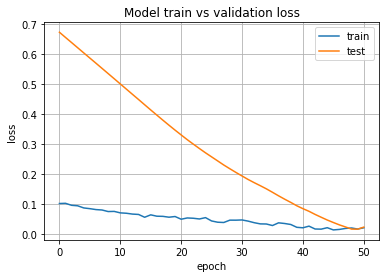

In [14]:
# 绘制损失图
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model train vs validation loss', fontsize='12')
plt.ylabel('loss', fontsize='10')
plt.xlabel('epoch', fontsize='10')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
#模型预测收益率
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [16]:
#数据格式转换
y_predict1 = pd.DataFrame(y_predict)
test_X1 = pd.DataFrame(test_X[:, :6])
test_y1 = pd.DataFrame(test_y)

In [17]:
# invert scaling for forecast
#将预测结果按比例反归一化
inv_y_test = pd.concat((test_X1,y_predict1), axis=1)
inv_y_test = scaler.inverse_transform(inv_y_test)
inv_y_predict=inv_y_test[:,-1]
 
# invert scaling for actual
#将真实结果按比例反归一化
test_y = test_y.reshape((len(test_y), 1))
inv_y_train = pd.concat((test_X1,test_y1), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y = inv_y_train[:, -1]
print('反归一化后的预测结果：',inv_y_predict)
print('反归一化后的真实结果：',inv_y)

反归一化后的预测结果： [ 573049.87414886  651070.41941935  660321.26344558  709463.49088038
  772093.9679768   840669.95356565  919425.75242766 1000619.64213603]
反归一化后的真实结果： [538580.  592963.2 643563.1 688858.2 746395.1 832035.9 919281.1 986515.2]


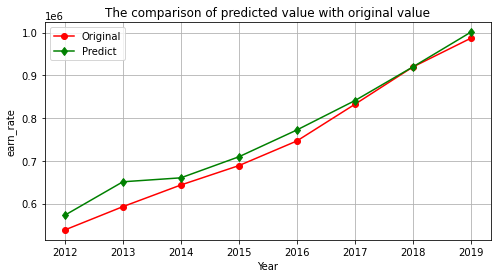

In [18]:
#绘制模型预测结果图
x = np.arange(2012,2020)
plt.figure(figsize=(8,4))
plt.plot(x,inv_y,'ro-',label='Original')
plt.plot(x,inv_y_predict,'gd-',label='Predict')
plt.xlabel('Year')
plt.ylabel('earn_rate')
plt.title('The comparison of predicted value with original value')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
#回归评价指标
# calculate MSE 均方误差
mse=mean_squared_error(inv_y,inv_y_predict)
# calculate RMSE 均方根误差
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(inv_y,inv_y_predict)
#calculate R square
r_square=r2_score(inv_y,inv_y_predict)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差: 775496266.922105
均方根误差: 27847.733605
平均绝对误差: 22315.320500
R_square: 0.964635


In [20]:
"""
#使归一化后的数据的行列索引与原数据相同
data_new = pd.DataFrame(data_scaler,columns=data.columns,index=data.index)
data_new.head(5)

#反归一化,将数据恢复成原数据同一量级
data1 = scaler.inverse_transform(data_scaler)
#使反归一化后的数据的行列索引与原数据相同
data1 = pd.DataFrame(data1,columns=data.columns,index=data.index)
#使数据保留一位小数位，不以科学计数法显示
data1 = round(data1,1)
data1.head(5)
"""

'\n#使归一化后的数据的行列索引与原数据相同\ndata_new = pd.DataFrame(data_scaler,columns=data.columns,index=data.index)\ndata_new.head(5)\n\n#反归一化,将数据恢复成原数据同一量级\ndata1 = scaler.inverse_transform(data_scaler)\n#使反归一化后的数据的行列索引与原数据相同\ndata1 = pd.DataFrame(data1,columns=data.columns,index=data.index)\n#使数据保留一位小数位，不以科学计数法显示\ndata1 = round(data1,1)\ndata1.head(5)\n'